#### ACCQ203
# TP 8 - Primalité

## Exo 114

In [1]:
def testRM(n, forcer_a = False, valeur_a = 2):

    if not(forcer_a) :
        a = randint(2,n-1)
    else :
        a = valeur_a
    v = valuation(n-1,2)
    m = (n-1)/(2^v)

    if gcd(a,n) > 1 :
        return False

    b = mod(a^m,n)
    if b == 1 :
        return True

    for i in range(1,v+1) :
        if mod(b^2,n) == 1 :
            g = gcd(b+1,n)
            if g == 1 or g == n :
                return True
            else :
                return False
        b = mod(b^2,n)

    return False

In [2]:
testRM(3)

True

In [3]:
testRM(79)

True

In [4]:
testRM(20)

False

In [5]:
testRM(561)

False

## Exo 115

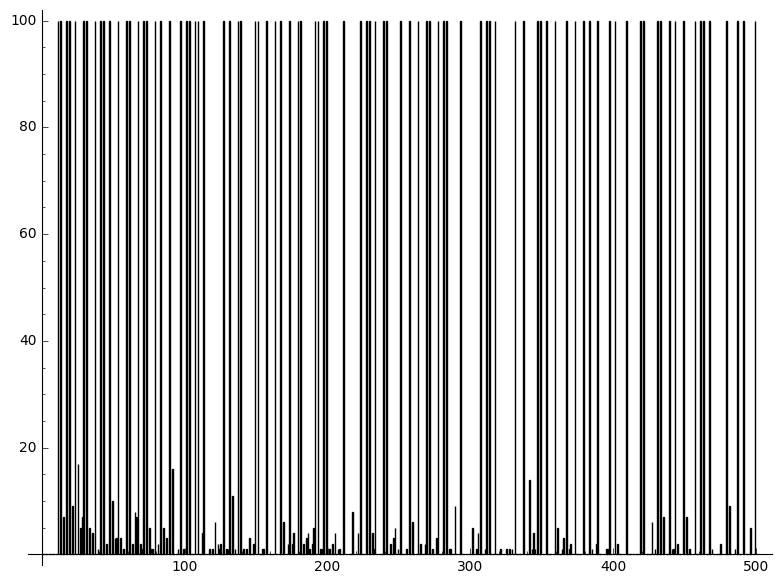

In [6]:
test = [sum(testRM(n) for i in range(100)) for n in range(10,501)]
bar_chart([0 for i in range(10)]+test)

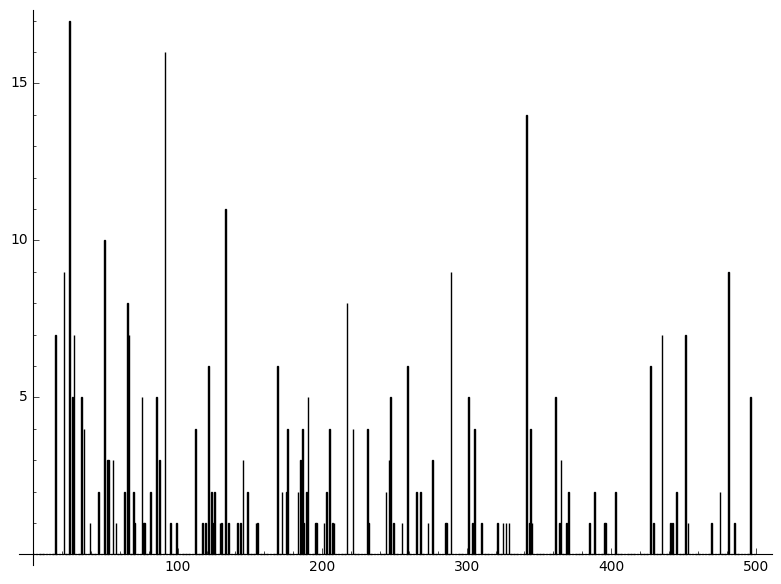

In [7]:
for i in range(len(test)):
    if is_prime(10+i):
        test[i] = 0

bar_chart([0 for i in range(10)]+test)

In [8]:
erreurs = [10+i for i in range(len(test)) if test[i]>10]
erreurs

[25, 91, 133, 341]

In [9]:
map(factor,erreurs)

[5^2, 7 * 13, 7 * 19, 11 * 31]

In [10]:
def testRM2(n):
    for i in range(25):
        if not(testRM(n)) :
            return False
    return True

## Exo 118

In [11]:
def testSS(n):
    if is_even(n) :
        return False

    a = randint(2,n-1)

    if gcd(a,n) != 1 :
        return False

    if jacobi_symbol(a,n) == mod(a^((n-1)/2),n) :
        return True
    else :
        return False

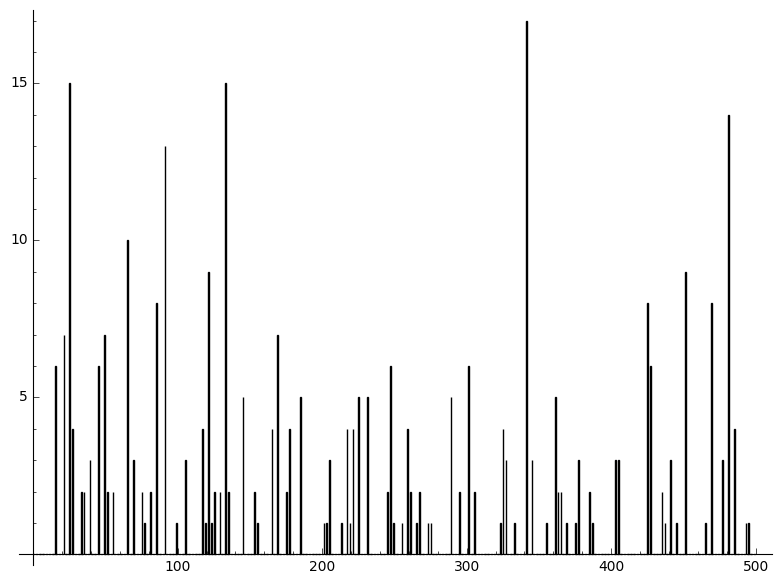

In [12]:
test = [sum(testSS(n) for i in range(100)) for n in range(10,501)]
for i in range(len(test)):
    if is_prime(10+i) :
        test[i] = 0
bar_chart([0 for i in range(10)]+test)

In [13]:
erreurs = [10+i for i in range(len(test)) if test[i]>=10]
erreurs

[25, 65, 91, 133, 341, 481]

In [14]:
map(factor, erreurs)

[5^2, 5 * 13, 7 * 13, 7 * 19, 11 * 31, 13 * 37]

In [15]:
def testSS2(n) :
    for i in range(50):
        if not(testSS(n)) :
            return False
    return True

In [17]:
sum(testSS2(341) for i in range(100)),sum(testSS2(49) for i in range(100)),sum(testSS2(133) for i in range(100))

(0, 0, 0)

## Exo 119

In [18]:
def isTemoinRM(n,a):

    v = valuation(n-1,2)
    m = (n-1)/(2^v)
    if gcd(a,n) != 1 :
        return False

    b = mod(a^m,n)
    if b == 1 :
        return False
    for i in range(1,v+1) :
        if mod(b^2,n) == 1 :
            if mod(b+1,n) == 0 :
                return False
            else :
                return True
        b = mod(b^2,n)

    return True

In [19]:
def isTemoinSS(n,a):
    if gcd(a,n) != 1 :
        return False

    if mod(jacobi_symbol(a,n)-a^((n-1)/2),n) == 0 :
        return False
    else :
        return True

In [21]:
listeRMvsSS = []
for n in range(10,151):
    if is_odd(n):
        for a in range(n):
            if gcd(a,n)==1 and isTemoinRM(n,a) and not(isTemoinSS(n,a)):
                listeRMvsSS += [(n,a)]
                break
listeRMvsSS

[(45, 19), (65, 14), (85, 16), (105, 8), (117, 53), (145, 59)]

## Exo 121

In [22]:
def testL(n,p,q):

    delta = p^2-4*q
    g = gcd(n,2*q*delta)
    if (1<g and g<n) :
        return False
    elif (g==n) :
        print("Mauvais choix de (p,q)")
        return

    m = n - jacobi_symbol(delta,n)
    t = 0
    while (is_even(m)):
        m = m/2
        t+=1

    u = [0,1]
    for k in range(m-1):
        u += [p*u[k+1]-q*u[k]]
    g = gcd(n,u[m])
    if (1<g and g<n) :
        return False
    elif (g==n) :
        return True

    v = [2,p]
    for k in range(m-1):
        v += [p*v[k+1]-q*v[k]]
    g = gcd(n,v[m])
    if (1<g and g<n) :
        return False
    elif (g==n) :
        return True
    for s in range(1,t):
        for k in range(2^(s-1)*m-1,2^s*m-1):
            v += [p*v[k+1]-q*v[k]]
        g = gcd(n,v[2^s*m])
        if (1<g and g<n) :
            return False
        elif (g==n) :
            return True

    return False

In [23]:
testL(3,2,2)

True

In [25]:
testL(79,2,3)

True

In [26]:
testL(20,2,3)

False

In [27]:
testL(561,2,6)

False

## Exo 122

In [28]:
def testBPSW(n):

    if not(testRM(n,forcer_a=True)):
        return False
    delta = 5
    k = 0
    while(jacobi_symbol(delta,n)!=-1):
        k+=1
        delta = (-1)^k*(2*k+5)
    p = 1
    q = (1-delta)/4
    return testL(n,p,q)

In [29]:
test = False
for n in range(3,1000) :
    if testBPSW(n) != is_prime(n):
        test = True
test

False